In [195]:
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [196]:
img = cv2.imread('Sample.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

257 733 3


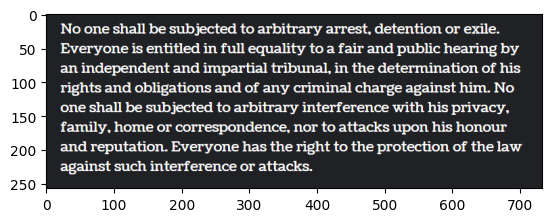

In [197]:
h,w,c = img.shape
print(h,w,c)
# Scaling the image which are beyond 1000 pixels
if w > 1000:
    scale_percent = 1000 / w
    width = int(w * scale_percent)
    height = int(h * scale_percent)
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img)


In [198]:
def threshold_image(image):
    # Greyscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Remove background
    ret,thresh1 = cv2.threshold(gray_image,80,255,cv2.THRESH_BINARY)
    # Skipped blurring
    # blurred_image = cv2.GaussianBlur(thresh1,(5,5),100)
    return thresh1

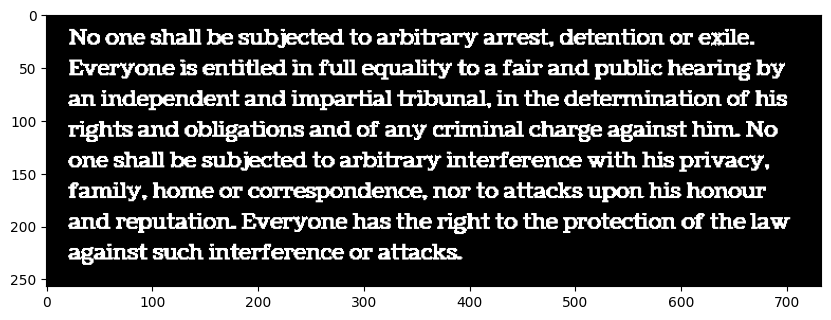

In [199]:
threshold_image = threshold_image(img)
plt.figure(figsize=(10,10))
plt.imshow(threshold_image,cmap='gray')

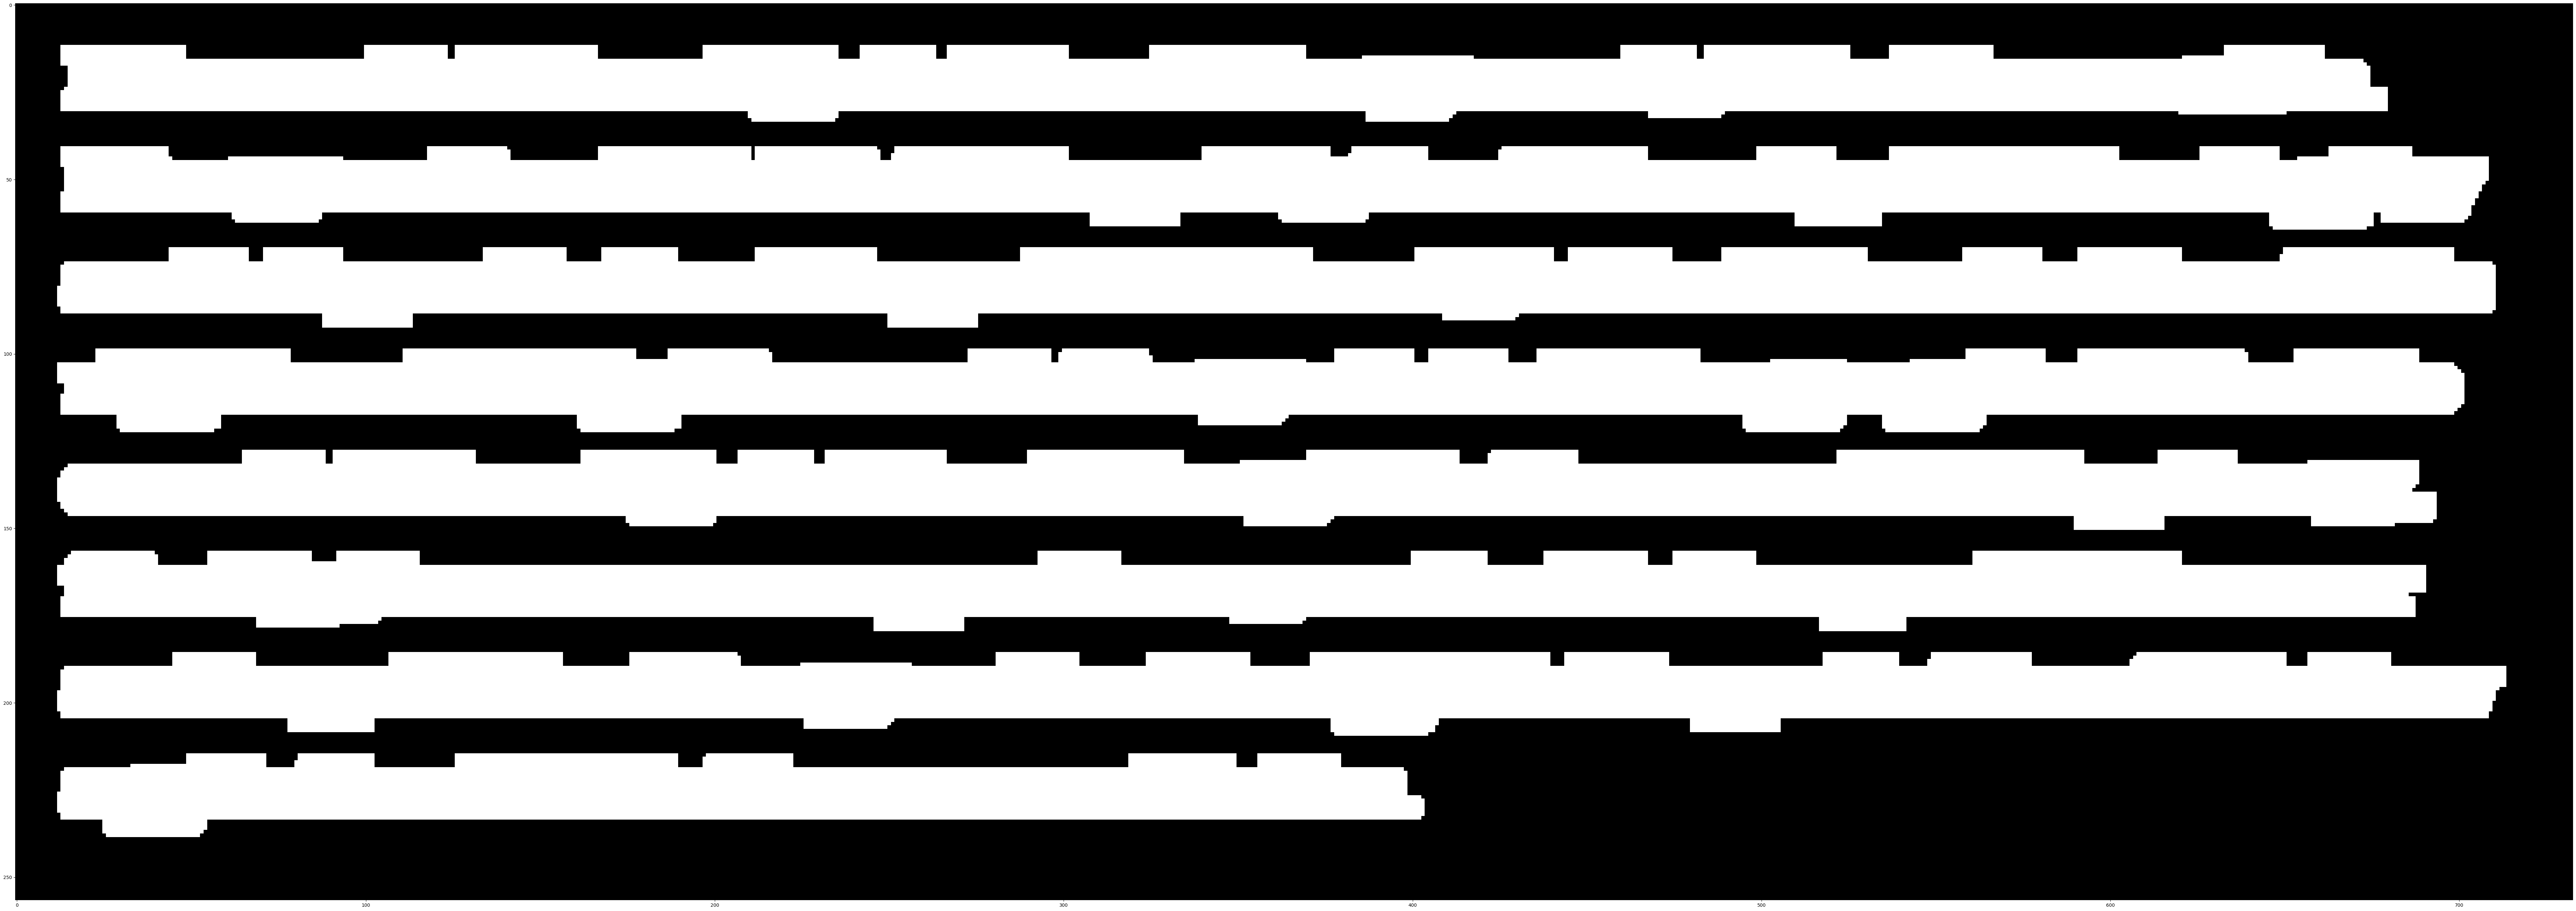

In [200]:
kernel = np.ones((5,20),np.uint8)
dialated_img = cv2.dilate(threshold_image,kernel,iterations = 1)
plt.figure(figsize=(100,100))
plt.imshow(dialated_img,cmap='gray')

In [201]:
# Line Segmentation
(contours, hierarchy) = cv2.findContours(dialated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours = sorted(contours, key= lambda x: cv2.boundingRect(x)[1])
print(len(sorted_contours))

8


(-0.5, 732.5, 256.5, -0.5)

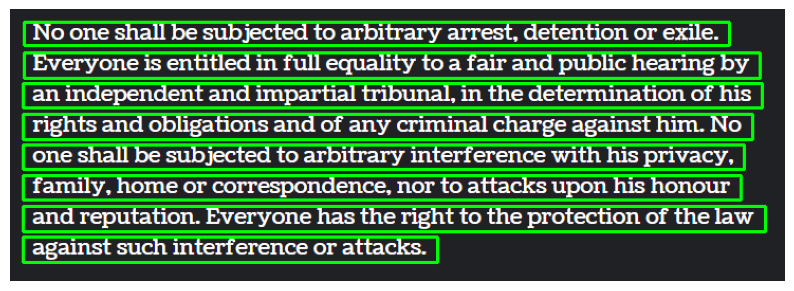

In [202]:
img2 = img.copy()
for contour in sorted_contours:
  (x, y, w, h) = cv2.boundingRect(contour)
  cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.axis('off')

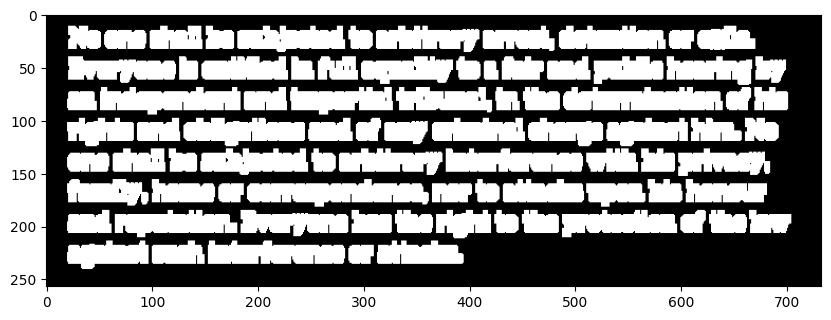

In [203]:
kernel = np.ones((8,3) , np.uint8)
dialated_2 = cv2.dilate(threshold_image,kernel,iterations = 1)
plt.figure(figsize=(10,10))
plt.imshow(dialated_2,cmap='gray')

(-0.5, 732.5, 256.5, -0.5)

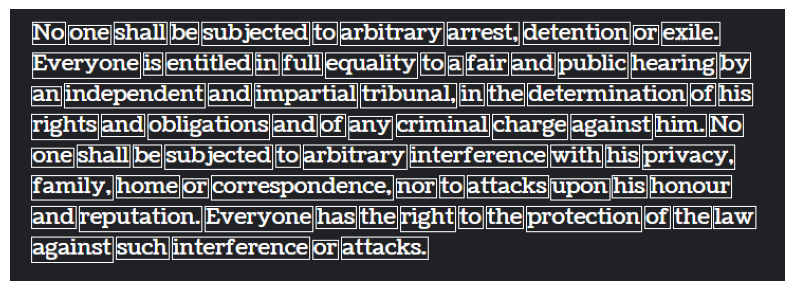

In [204]:

img_3  = img.copy()
words_list = []
for line in sorted_contours:
    (x, y, w, h) = cv2.boundingRect(line)
    roi_line = dialated_2[y:y+h, x:x+w]  # Correct slicing to use height

    (cnt, hierarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda x: cv2.boundingRect(x)[0])

    for cnt in sorted_contour_words:
        if cv2.contourArea(cnt) < 100:
            continue
        (x2, y2, w2, h2) = cv2.boundingRect(cnt)
        words_list.append(img_3[y + y2:y + y2 + h2, x + x2:x + x2 + w2])  # Correct slicing
        cv2.rectangle(img_3, (x + x2, y + y2), (x + x2 + w2, y + y2 + h2), (255, 255, 255), 1)

plt.figure(figsize=(10,10))
plt.imshow(img_3, cmap='gray')
plt.axis('off')



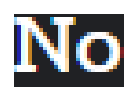

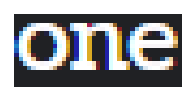

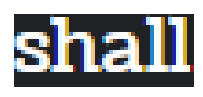

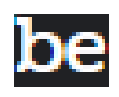

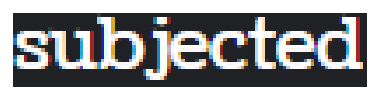

In [205]:
# Printing the first five words
for i in range(5):
    img = words_list[i]
    height, width = img.shape[:2]
    aspect_ratio = width / height

    # Set figure size based on the aspect ratio
    plt.figure(figsize=(1 * aspect_ratio, 1))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
